# visualizing sRNA 

In [74]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

from bokeh.models import Range1d, Plot, BoxZoomTool, WheelZoomTool, PanTool, MultiLine, ResetTool, HoverTool

from bokeh.models.graphs import from_networkx

In [2]:
url = 'https://query.wikidata.org/sparql'

# query from sparql
query = """
SELECT DISTINCT ?srna ?srnaLabel ?target ?targetLabel
WHERE 
{
  ?srna wdt:P31 wd:Q11053.
  ?srna wdt:P31 wd:Q427087.
  ?srna wdt:P128 ?target.
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}"""

r = requests.get(url, params={'format': 'json', 'query': query}) # get content as json
data = r.json() # returns data as json

In [3]:
# keys of data
data.keys()

dict_keys(['head', 'results'])

In [4]:
# create list
sRNA_target = []
for result in data['results']['bindings']:
    sRNA_target.append([result['srnaLabel']['value'], result['targetLabel']['value']])

# visualisation in networkx

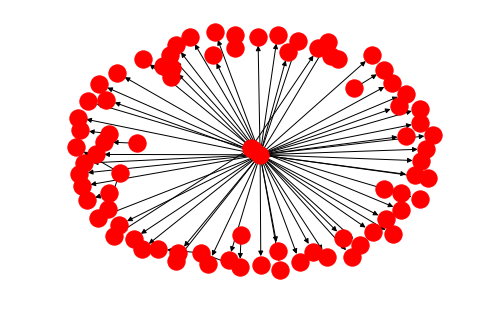

In [5]:
# create empty directed graph
G = nx. DiGraph()

# add list as edges
G.add_edges_from(sRNA_target)

# show directed graph of sRNA and its targets
nx.draw(G)
plt.show()

# visualisation with bokeh

In [6]:
output_notebook()

Loading BokehJS ...

In [71]:
# hovertool to see which circle is which sRNA/target
hover = HoverTool(tooltips=[('name', "@index")])

plot = Plot(x_range=Range1d(-2, 2), y_range=Range1d(-2, 2), tools=[BoxZoomTool(), WheelZoomTool(), PanTool(), ResetTool(),
                                                                  hover])

# create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(G, nx.spring_layout, scale=1.8, center=(0,0))
plot.renderers.append(graph)

graph.node_renderer.glyph.update(size=20, fill_color="orange")

graph.edge_renderer.glyph=MultiLine(line_color="#2E2E2E", line_alpha=1, line_width=0.2)

show(plot)